Basic Review gathering and sentiment anlysis.
Import necessay libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import review csv file

In [6]:
praRev = pd.read_csv('./jsonToCSV/CSV_files/revPrayagCSV.csv')
praRev.shape

(490, 7)

dataset info

In [7]:
praRev.head()

,rating_text,rating,foodie_level_num,review_time_friendly,id,likes,review_text
0,Great!,4.0,2,3 days ago,2400052,0,One of the best biriyani point at Allahabad So...
1,Insane!,5.0,3,4 days ago,2400052,0,Bbbbrrrriiiiiiiyyyyyyaaaannnnniiiiii💕💕💕🔥🔥🔥 the...
2,Great!,4.0,2,4 days ago,2400052,0,"Biryani was really delicious. Also, Raita is a..."
3,Insane!,5.0,2,6 days ago,2400052,0,Eat on is one of the best chicken biryani rest...
4,Insane!,5.0,2,11 days ago,2400052,1,Awesome Biryani And I Like To Eat Here With My...


In [8]:
praRev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
rating_text             490 non-null object
rating                  490 non-null float64
foodie_level_num        490 non-null int64
review_time_friendly    490 non-null object
id                      490 non-null int64
likes                   490 non-null int64
review_text             490 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 26.9+ KB


Explore Dataset

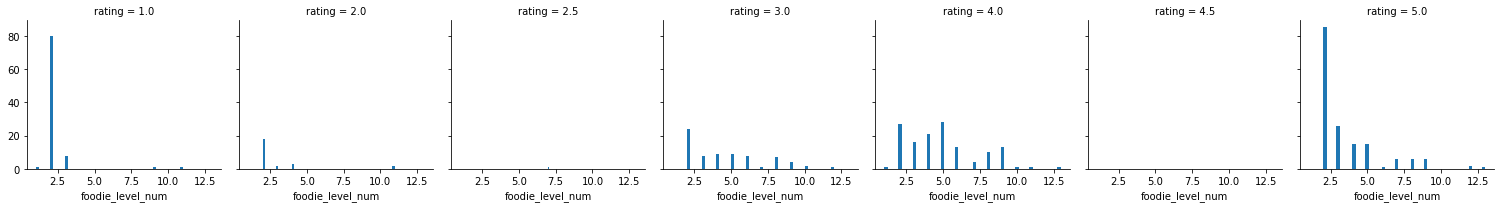

In [9]:
g = sns.FacetGrid(data=praRev, col='rating')
g.map(plt.hist, 'foodie_level_num', bins=50)

It is interesting to note that foodie level 2 and 3 give most of the reviews here.
Also, most of the reviews are either 1 star or 5 star rated.

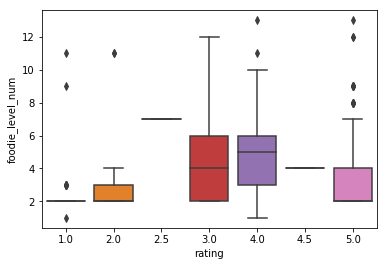

In [10]:
sns.boxplot(x='rating', y='foodie_level_num', data=praRev)

most of the high foodie levels give rating as 3 or 4 star. But this correlation might not be that important for predicting sentiment of a review as, we can sight various outliers here.
We will work on rating_text now.

In [11]:
stars = praRev.groupby('rating').mean()
stars.corr()

,foodie_level_num,id,likes
foodie_level_num,1.000000,-0.627552,0.322632
id,-0.627552,1.000000,-0.771674
likes,0.322632,-0.771674,1.000000


we get correlation between numerical fields only .So we'll try if we can convert some text field to numerical.Heatmap for another grasp of correlation.

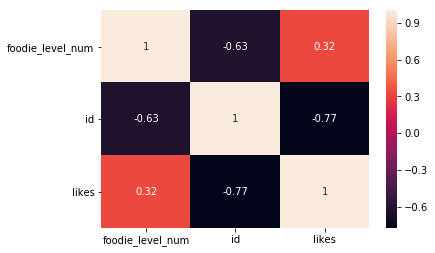

In [12]:
sns.heatmap(data=stars.corr(), annot=True)

As expected no. of likes on a review depend on the foodie_level_num.
Now let's try and do the relatively simple task and first leave some non extreme rated reviews.

In [13]:
praRevext = praRev[(praRev['rating']!=2.5)&(praRev['rating']!=3)]
praRevext.shape

(416, 7)

Get required columns for cassification

In [14]:
X = praRevext['review_text'].tolist()
Y = np.asarray(praRevext['rating'], dtype="|S6")
X[0]

'One of the best biriyani point at Allahabad So tasty an so friendly and staff is also liable I am so happy good soooo good biriyani yummy Fe...'

TEXT PREPROCESSING
Here our reviews are in plain text.The classification algo will need some feature vector in order to perform the classification task. The simplest way to convert a corpus to a vector format is the bag-of-words approach, where each unique word in a text will be represented by one number.
The function below removes punctuation, stopwords, and returns a list of the remaining words, or tokens.

In [15]:
import string
import nltk
from nltk.corpus import stopwords
def text_process(text):

    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''

    nopunc = [char for char in text if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    ans = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return ans

Function test

In [16]:
sample = "This is just a random sentence, we will like to test if .... we can remove unwanted parts!!"

print(text_process(sample))

['random', 'sentence', 'like', 'test', 'remove', 'unwanted', 'parts']


Now we have to vectorise the text collection into token matrix to enable the scikit learn algos here.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(encoding="utf-8",analyzer=text_process)
#some reviews have empty strings as texts so we need to remove it from X 

bow = vectorizer.fit(X)
print(vectorizer.get_feature_names())
print len(bow.vocabulary_)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


['0', '1', '10', '100', '130', '15', '150', '16th', '1920', '1st', '2', '20', '2019', '210', '25', '255', '2nd', '3', '30', '300', '35', '366', '3rd', '4', '400', '410', '49', '4th', '5', '50', '500', '69', '69\xe2\x82\xb9', '7', '7th', '9280', 'AG', 'Aaj', 'Absolutely', 'According', 'Actually', 'Affordable', 'Allaha', 'Allahabad', 'AllahabadPrayagraj', 'AllahabadRoof', 'AllahabadThe', 'Along', 'Aloo', 'Also', 'Always', 'Amaizing', 'Amazing', 'Ambiance', 'Ambience', 'American', 'Anda', 'Anyone', 'Attractions', 'Avg', 'Awaited', 'Aweso', 'Awesome', 'BLISS', 'Bad', 'Bada', 'Bahut', 'Balaji', 'Balluchi', 'Banate', 'Barcode', 'Barra', 'Bbbbrrrriiiiiiiyyyyyyaaaannnnniiiiii\xf0\x9f\x92\x95\xf0\x9f\x92\x95\xf0\x9f\x92\x95\xf0\x9f\x94\xa5\xf0\x9f\x94\xa5\xf0\x9f\x94\xa5', 'Bcz', 'Beautiful', 'Ben', 'Beside', 'Best', 'Bewakuf', 'Bhalla', 'Bhara', 'Bhature', 'Bhawan', 'Bhel', 'Bhuna', 'Big', 'Bikaner', 'Bikanervala', 'Bikanerwala', 'Biriyani', 'Biryani', 'Bite', 'Bliss', 'Blissful', 'Blkl', 'Blu

now lets look how this works

In [167]:
rev18 = X[18]
print rev18
bow18 = bow.transform([rev18])
print bow18

Very slow service. Horrible hospitality. The waiters were full of attitude and had a very mean behaviour. Not worth going. The food takes ab...
  (0, 225)	1
  (0, 496)	1
  (0, 590)	1
  (0, 635)	1
  (0, 1092)	1
  (0, 1136)	1
  (0, 1174)	1
  (0, 1249)	1
  (0, 1475)	1
  (0, 1932)	1
  (0, 1976)	1
  (0, 2082)	1
  (0, 2243)	1
  (0, 2289)	1


so there are 15 unique words from the bow in rev18 and one of them appears twice.Now lets vectorise the whole dataset X into the matrix.

In [168]:
X_mat = bow.transform(X)
print('Shape of Sparse Matrix: ', X_mat.shape)
print('Amount of Non-Zero occurrences: ', X_mat.nnz)

# Percentage of non-zero values
density = (100.0 * X_mat.nnz / (X_mat.shape[0] * X_mat.shape[1]))
print( density)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


('Shape of Sparse Matrix: ', (416, 2345))
('Amount of Non-Zero occurrences: ', 5720)
0.586353944563


Training and testing data

In [169]:
from sklearn.model_selection import train_test_split

trainFt, testFt, trainLabel, testLabel = train_test_split(X_mat, Y, test_size=0.3, random_state=101)
trainFt = trainFt.toarray()
testFt = testFt.toarray()
print trainFt.shape
print trainLabel.shape

(291, 2345)
(291,)


Applying different Models:
Multinomial Naive bayes

In [171]:
from sklearn.naive_bayes import MultinomialNB

#Train model with training data
nb = MultinomialNB()
nb.fit(trainFt, trainLabel)

#get prediction on testing data
preds = nb.predict(testFt)

#checking the accuracy of prediction
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(testLabel, preds))
print('\n')
print(classification_report(testLabel, preds))

[[19  1  2  1]
 [ 3  0  1  1]
 [ 5  1 22 21]
 [ 4  0 11 33]]


             precision    recall  f1-score   support

        1.0       0.61      0.83      0.70        23
        2.0       0.00      0.00      0.00         5
        4.0       0.61      0.45      0.52        49
        5.0       0.59      0.69      0.63        48

avg / total       0.58      0.59      0.58       125



As we can see we don't have very satisfactory result and that is because of our ineffective dataset or irrelevant unigrams.